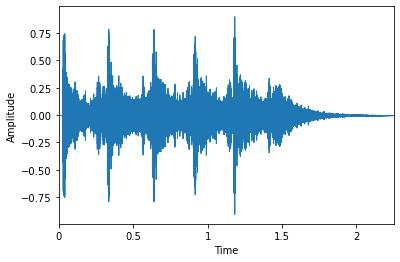

In [9]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

file = "7061-6-0-0.wav"

#waveform
signal, sr = librosa.load(file, sr=22050) # sr * T -> 22050*30 samples each having its amplitude

librosa.display.waveplot(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

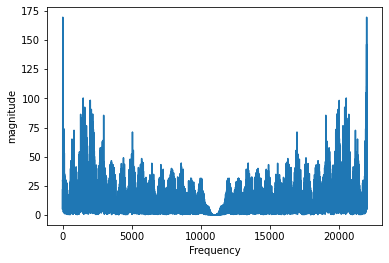

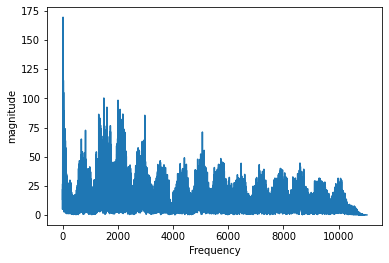

In [12]:
#fft spectrum
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]

plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("magnitude")
plt.show()
                           
plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("magnitude")
plt.show()

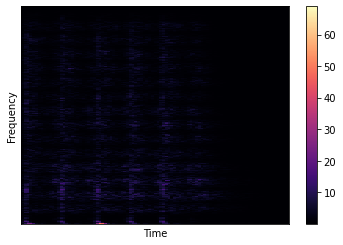

In [14]:
n_fft = 2048 #window or amount of samples considered to calculate fft
hop_length = 512 #amount of samples to be shifted to right

stft = librosa.core.stft(signal, hop_length= hop_length, n_fft = n_fft)
spectrogram = np.abs(stft)

librosa.display.specshow(spectrogram, sr=sr, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

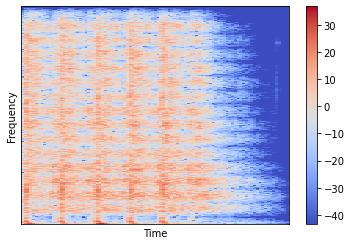

In [15]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

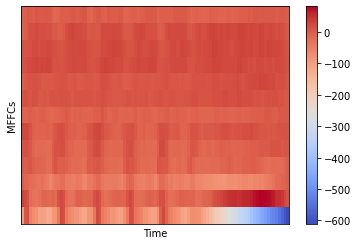

In [18]:
#MFCCs with 13 mfcc coefficients for each time interval
MFFCs = librosa.feature.mfcc(signal, n_fft = n_fft, hop_length = hop_length, n_mfcc=13)

librosa.display.specshow(MFFCs, sr=sr, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("MFFCs")
plt.colorbar()
plt.show()